Medical Cost Prediction


Complexity  : Basic



Inputs [independent features] : age, sex, BMI(body mass index), children, smoker and region feature.

[dependent features] : Charge

Methodology to be used : Linear Regression 

Prinicple used in Linear Regression : Oridnary Least Square (OLS) & Mean Squared Error (MSE)

OLS :  Goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
#Loading the Dataset
inr_raw_data=pd.read_csv('insurance.csv',sep=",")

In [3]:
print("Shape of the dataset is ",inr_raw_data.shape)

Shape of the dataset is  (1338, 7)


In [4]:
inr_raw_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Expected Hypothesis Formulated :

𝐡𝜃(𝐱𝐢)=𝜃0+𝜃1𝐚𝐠𝐞+𝜃2𝐬𝐞𝐱+𝜃3𝐛𝐦𝐢+𝜃4𝐜𝐡𝐢𝐥𝐝𝐫𝐞𝐧+𝜃5𝐬𝐦𝐨𝐤𝐞𝐫+𝜃6𝐫𝐞𝐠𝐢𝐨𝐧

In [5]:
inr_raw_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# #need to encode object features in respective formats 
# Label encoding> ordinal data
# one hot encoding > nominal data
inr_raw_data.describe(exclude='number').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [7]:
inr_raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


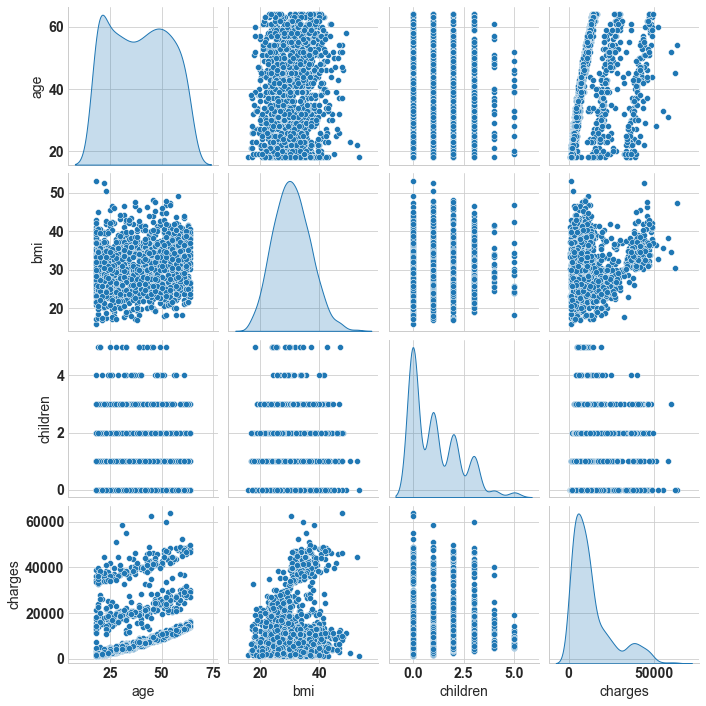

In [8]:
sns.pairplot(inr_raw_data, diag_kind='kde')

In [9]:
inr_raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

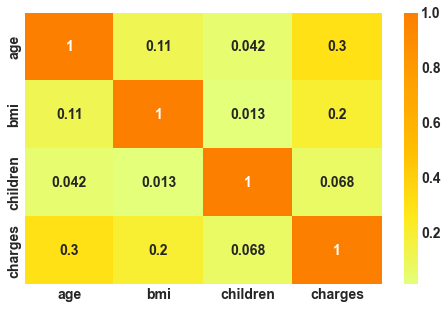

In [10]:
Corr_df=inr_raw_data.corr()
sns.heatmap(Corr_df, cmap = 'Wistia', annot= True)

In [11]:
n_duplicates = inr_raw_data.duplicated().sum()
print("Duplicate Entries : ",n_duplicates)

Duplicate Entries :  1


In [12]:
inr_raw_data[inr_raw_data.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
columns_Exe_Index = inr_raw_data.columns
inr_raw_data = inr_raw_data.drop_duplicates(subset=columns_Exe_Index)
inr_raw_data.shape

(1337, 7)

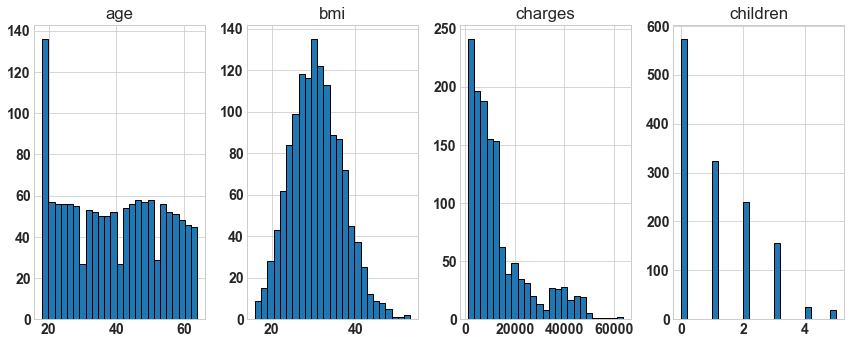

In [14]:
inr_raw_data.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

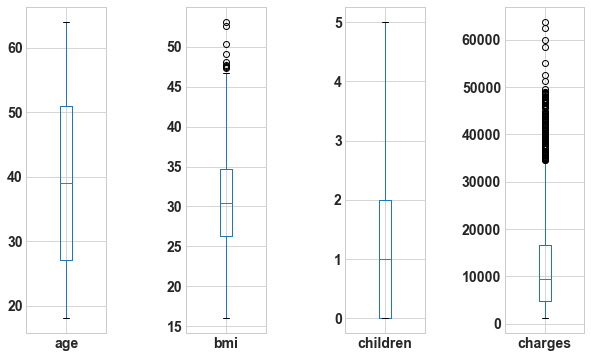

In [15]:
inr_raw_data.plot(kind='box', subplots=True, sharey=False, figsize=(10, 6))
# increase spacing between subplots
plt.subplots_adjust(wspace=1) 
plt.show()

Text(0.5, 1.0, 'Box plot of charges vs children')

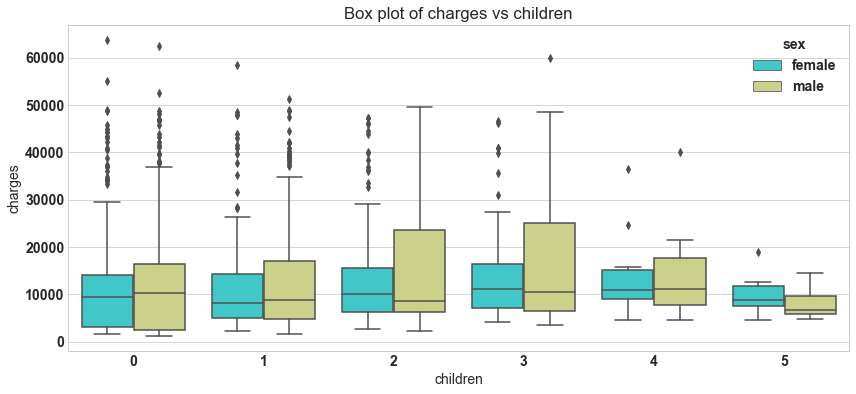

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=inr_raw_data,palette='rainbow')
plt.title('Box plot of charges vs children')

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

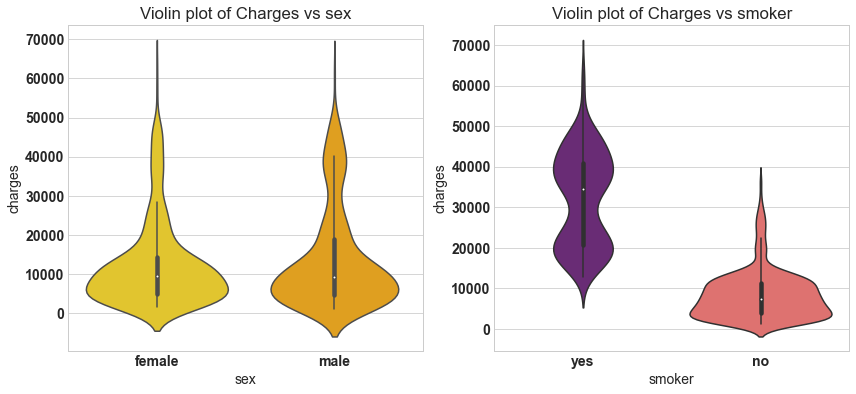

In [17]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=inr_raw_data,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=inr_raw_data,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

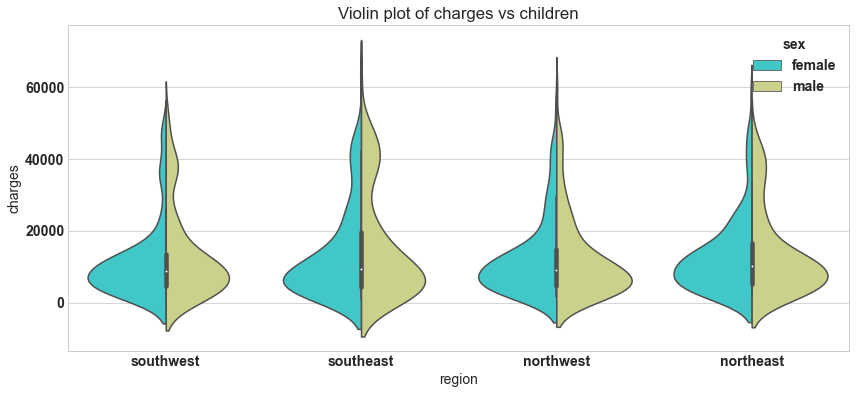

In [18]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=inr_raw_data,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');


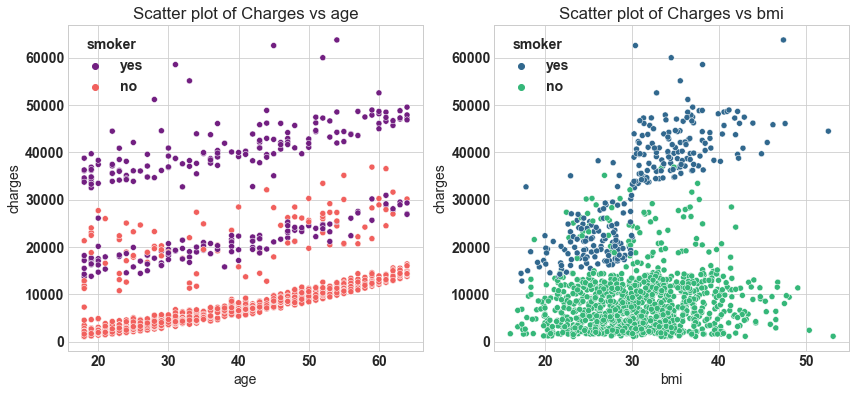

In [19]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=inr_raw_data,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=inr_raw_data,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [20]:
# Encoding Categorical Variables :
Categorical_columns = list(inr_raw_data.select_dtypes(exclude="number").columns)
Categorical_columns.append('children')
    

In [21]:
df_encode = pd.get_dummies(data = inr_raw_data, prefix = 'OHE', prefix_sep='_',
               columns = Categorical_columns,
               drop_first =True,
              dtype='int8')

In [22]:
df_encode

,age,bmi,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5
0,19,27.900,16884.92400,0,1,0,0,1,0,0,0,0,0
1,18,33.770,1725.55230,1,0,0,1,0,1,0,0,0,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,1,0,0
3,33,22.705,21984.47061,1,0,1,0,0,0,0,0,0,0
4,32,28.880,3866.85520,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,1,0,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,1,0,0,0,0,0,0
1336,21,25.800,2007.94500,0,0,0,0,1,0,0,0,0,0


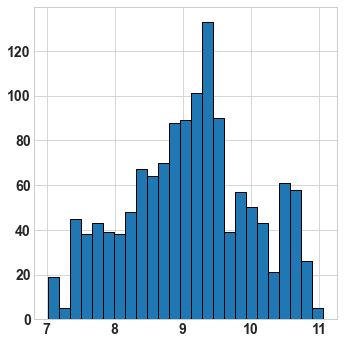

In [23]:
df_encode['charges']=np.log(df_encode['charges'])

df_encode['charges'].hist(bins=25, figsize=(5, 5), edgecolor="black")
plt.tight_layout();

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(df_encode.loc[:,df_encode.columns != 'charges'],df_encode['charges'],test_size=0.25)

In [38]:
X_test.shape

(335, 12)

In [69]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
Zipped_d=dict(zip(X_train.columns,list(lin_reg.coef_)))
Zipped_d

{'age': 0.034141724827164294,
 'bmi': 0.013706043081297373,
 'OHE_male': -0.09149267424525505,
 'OHE_yes': 1.5461761044342779,
 'OHE_northwest': -0.06144135594310205,
 'OHE_southeast': -0.14446122644079218,
 'OHE_southwest': -0.11415183122468865,
 'OHE_1': 0.16712012339892682,
 'OHE_2': 0.28957323288898473,
 'OHE_3': 0.22813800932198125,
 'OHE_4': 0.47870752910188485,
 'OHE_5': 0.4680209598078544}

Evaluating our Model

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula

𝐑2  is statistical measure of how close data are to the fitted regression line.  𝐑2  is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.



In [76]:
y_pred=lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(y_pred,Y_test)

RSquare = lin_reg.score(X_test,Y_test)

print("MSE :",MSE)
print("RSquare :",RSquare)

MSE : 0.20160660532468694
RSquare : 0.7564347614703554


Checking assumptions of model:
    
Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value

The residual error plot should be normally distributed.

The mean of residual error should be 0 or close to 0 as much as possible

The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.

Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  𝐕𝐈𝐅=11−𝐑2 , If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.


Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

/Users/rehal/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/rehal/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


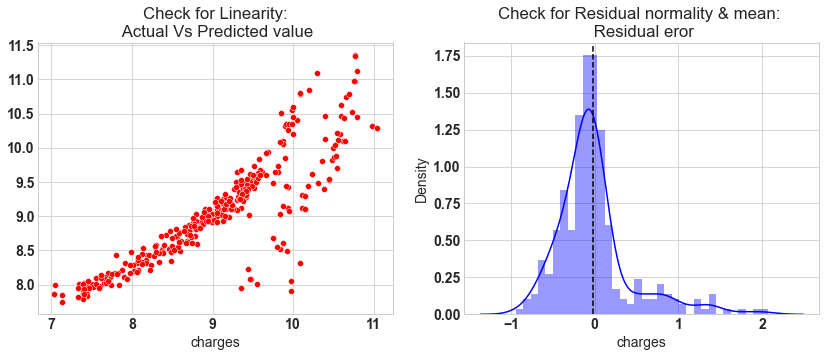

In [79]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(Y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((Y_test - y_pred),ax=ax,color='b')
ax.axvline((Y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

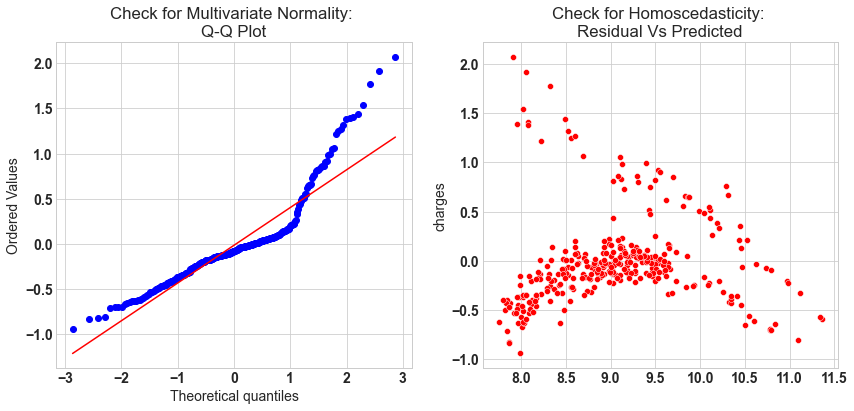

In [81]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((Y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (Y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [84]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- RSquare)
VIF

4.105676187771305

The model assumption linear regression as follows

In our model the actual vs predicted plot is curve so linear assumption fails

The residual mean is zero and residual error plot right skewed

Q-Q plot shows as value log value greater than 1.5 trends to increase

The plot is exhibit heteroscedastic, error will insease after certian point.

Variance inflation factor value is less than 5, so no multicollearity.
